# Penyakit Menular di DKI Jakarta - Analisis Data Eksploratif

Dilansir dari [alodokter.com](https://www.alodokter.com/penyakit-menular-yang-umum-di-indonesia), penyakit menular merupakan penyakit infeksi yang disebabkan oleh mikrorganisme, seperti virus, bakteri, parasit, atau jamur, dan dapat berpindah ke orang lain yang sehat. Contoh dari penyakit menular yang umum terjadi antara lain:
*   Infeksi Saluran Pernapasan Akut (ISPA)
*   Diare
*   Tuberkolosis (TBC)
*   Penyakit Kulit
*   Malaria
*   Dan lain-lain.

Penyakit menular dapat ditularkan secara langsung maupun tidak langsung. Pencegahan penyakit menular juga bisa diupayakan melalui kebiasaan hidup sehat. Di antaranya tidak meludah sembarangan, mencuci tangan, tidak memakai peralatan pribadi bersamaan dengan orang lain, serta mengonsumsi makanan sehat dan bergizi untuk meningkatkan daya tahan tubuh terhadap penyakit.

Berdasarkan hasil [Sensus Penduduk 2020](https://jakarta.bps.go.id/pressrelease/2021/01/22/541/jumlah-penduduk-hasil-sp2020-provinsi-dki-jakarta-sebesar-10-56-juta-jiwa.html), penduduk DKI Jakarta pada bulan September 2020 sebanyak 10,56 jiwa. Dibandingkan dengan tahun 2010, jumlah penduduk di DKI Jakarta meningkat sekitar 954 ribu jiwa, atau rata-rata sebanyak 88 ribu jiwa setiap tahun. Tingginya peningkatan jumlah penduduk di DKI Jakarta tentunya menimbulkan berbagai permasalahan seperti kemacetan, banjir, polusi udara, dan kesehatan.

Pada kesempatan kali ini, saya akan melakukan analisis data eksploratif mengenai jumlah penderita penyakit menular di DKI Jakarta. Data tersebut diperoleh dari [data.jakarta.go.id](https://data.jakarta.go.id/dataset/data-jumlah-penderita-penyakit-menular-menurut-jenis-penyakit-di-provinsi-dki-jakarta) dan telah saya gabung menjadi satu file berformat csv. Bahasa pemrograman yang dipakai adalah **Python**.

## 1. Import Packages

*Packages* yang digunakan adalah pandas, matplotlib, dan seaborn.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Data

In [ ]:
data = pd.read_csv("PenyakitMenularDKI.csv")
print(data)

     tahun           wilayah nama_penyakit  jumlah_penderita
0     2015  Kepulauan Seribu       Malaria                 0
1     2015   Jakarta Selatan       Malaria                 6
2     2015     Jakarta Timur       Malaria                 2
3     2015     Jakarta Pusat       Malaria                 4
4     2015     Jakarta Barat       Malaria                 5
..     ...               ...           ...               ...
211   2020   Jakarta Selatan           DBD              1020
212   2020     Jakarta Timur           DBD              1544
213   2020     Jakarta Pusat           DBD               367
214   2020     Jakarta Barat           DBD              1266
215   2020     Jakarta Utara           DBD               542

[216 rows x 4 columns]


Data yang digunakan merupakan data berformat *comma seperated value* (csv) bernama `PenyakitMenularDKI.csv`. Data tersebut diimport menggunakan pandas dan dimasukkan ke variabel bernama “data”. Dapat dilihat, data memiliki 216 baris (jumlah pengamatan) dan 4 kolom (jumlah variabel).

Kita dapat melihat nilai unik (*unique values*) pada kolom “tahun”, “wilayah”, dan “nama_penyakit” dengan:


In [ ]:
print(data['tahun'].unique())
print(data['wilayah'].unique())
print(data['nama_penyakit'].unique())

[2015 2016 2017 2018 2019 2020]
['Kepulauan Seribu' 'Jakarta Selatan' 'Jakarta Timur' 'Jakarta Pusat'
 'Jakarta Barat' 'Jakarta Utara']
['Malaria' 'Gastro Entritis' 'Kolera' 'Kusta' 'TBC' 'DBD']


*   Kolom ‘tahun’ berisikan tahun pengamatan dari 2015 sampai dengan 2020.
*   Kolom ‘wilayah’ berisikan nama kabupaten/kota administrasi yang beranggotakan: Kepulauan Seribu, Jakarta Selatan, Jakarta Timur, Jakarta Pusat, Jakarta Barat, dan Jakarta Utara.
*   Kolom ‘nama_penyakit’ berisikan nama penyakit yang beranggotakan: Malaria, Gastro Entritis, Kolera, Kusta, TBC, dan DBD.

## 3. Mengubah Jenis Data

Untuk melihat jenis data pada tiap kolom, kita dapat gunakan perintah:


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             216 non-null    int64 
 1   wilayah           216 non-null    object
 2   nama_penyakit     216 non-null    object
 3   jumlah_penderita  216 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.9+ KB
None


Dapat dilihat kolom ‘tahun’ dan ‘jumlah_penderita’ berkategori integer, kolom wilayah dan nama_penyakit berkategori object. Untuk analisis lebih lanjut, kolom ‘tahun’, ‘wilayah’, dan ‘nama_penyakit’ akan diubah menjadi kategori.

In [ ]:
data['tahun']=data['tahun'].astype('category')
data['wilayah']=data['wilayah'].astype('category')
data['nama_penyakit']=data['nama_penyakit'].astype('category')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tahun             216 non-null    category
 1   wilayah           216 non-null    category
 2   nama_penyakit     216 non-null    category
 3   jumlah_penderita  216 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 3.1 KB
None


Dengan perintah tersebut, jenis data pada kolom ‘tahun’, ‘wilayah’, dan ‘nama_penyakit’ berhasil diubah menjadi category.

## 4. Mengecek Missing Value

In [ ]:
print(data.isnull().sum())

tahun               0
wilayah             0
nama_penyakit       0
jumlah_penderita    0
dtype: int64


Jumlah data yang null pada tiap kolom berjumlah 0 yang berarti data sudah bersih dan dapat diolah ke tahap selanjutnya.

## 5. Line Plot Jumlah Penderita Penyakit Menular Tiap Tahun

tahun
2015    28499
2016    49186
2017    71012
2018    73871
2019    82363
2020    42315
Name: jumlah_penderita, dtype: int64


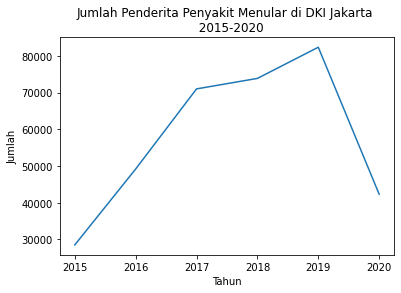

In [ ]:
pertahun = data.groupby('tahun').jumlah_penderita.sum()
print(pertahun)
pertahun.plot(kind='line',xlabel='Tahun',ylabel='Jumlah',title='Jumlah Penderita Penyakit Menular di DKI Jakarta \n  2015-2020')

Untuk dapat melihat jumlah penderita penyakit menular tiap tahun, kita dapat melakukan *grouping* pada kolom tahun. Setelah itu nilai pada kolom ‘jumlah_penderita’ akan dijumlahkan tiap grup. Data yang telah digrup tersebut dimasukkan ke dalam variabel “pertahun”. Setelah itu kita membuat plot menggunakan pandas.

Berdasarkan plot tersebut, jumlah penderita penyakit menular di DKI Jakarta **meningkat** sejak tahun 2015 sampai puncaknya di 2019. Pada tahun 2019, jumlah penderita penyakit menular mencapai 82.363 kasus. Namun, di tahun 2020 jumlah penderita **menurun** hampir 50% menjadi 42.315 kasus.

Kita juga dapat melihat jumlah penderita penyakit menular berdasarkan nama penyakit tiap tahun dengan membuat *pivot table*. Perintah untuk melakukannya yaitu:

nama_penyakit          DBD  Gastro Entritis  ...    Malaria          TBC
tahun                                        ...                        
2015            838.666667         0.000000  ...   3.333333  3855.000000
2016           3405.333333         0.000000  ...   8.000000  4732.666667
2017            560.333333      4804.666667  ...  10.333333  6410.000000
2018            442.333333      5632.166667  ...  10.500000  6164.833333
2019           1450.833333      5592.333333  ...   9.666667  6578.333333
2020            790.666667      2478.666667  ...  10.000000  3692.666667

[6 rows x 6 columns]


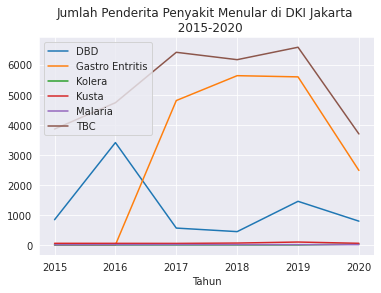

In [ ]:
tren = pd.pivot_table(data, index='tahun', columns='nama_penyakit', values='jumlah_penderita')
print(tren)
tren.plot(kind='line',xlabel='Tahun', title='Jumlah Penderita Penyakit Menular di DKI Jakarta \n  2015-2020').legend(loc='upper left')

Plot tersebut memberi informasi bahwa terdapat 3 penyakit yang jumlah kasusnya signifikan yaitu: DBD, Gastro Entritis, dan TBC. Diantara ketiganya, penderita penyakit TBC berjumlah terbanyak disusuli Gastro Entritis dan DBD.

## 6. Bar Chart Jumlah Penderita Penyakit Menular

Untuk dapat membuat *bar chart* tentang banyaknya penderita penyakit menular, kita akan membuat fungsi bernama “PlotGrup”. Fungsi tersebut akan menghitung jumlah penderita pada grup dan membuat *bar chart* menggunakan pandas. Perintah untuk fungsi tersebut adalah:

In [ ]:
def PlotGrup(grup,judul):
    data_a = data.groupby(grup).jumlah_penderita.sum().sort_values()
    print(data_a)
    data_a.plot(kind="barh",title=judul)

Fungsi PlotGrup membutuhkan 2 argumen:
1.   grup : Kolom yang akan menjadi dasar pengelompokkan.
2.   judul : Judul plot yang akan dibuatjudul : Judul plot yang akan dibuat

Selanjutnya, kita akan membuat *bar chart* jumlah penderita penyakit menular di DKI Jakarta digrup berdasarkan “nama_penyakit”.


nama_penyakit
Kolera                162
Malaria               311
Kusta                2196
DBD                 44929
Gastro Entritis    111047
TBC                188601
Name: jumlah_penderita, dtype: int64


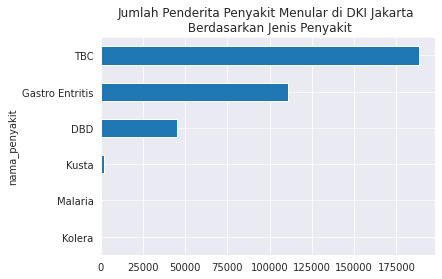

In [ ]:
PlotGrup(grup='nama_penyakit',judul='Jumlah Penderita Penyakit Menular di DKI Jakarta \n Berdasarkan Jenis Penyakit')

Dari *output* dan *bar chart* tersebut, kita dapat memverifikasi dugaan kita sebelumnya bahwa memang terdapat 3 penyakit yang jumlah penderitanya signifikan yaitu TBC, Gastro Entritis, dan DBD. Kita dapat melihat jumlah kasus pada masing-masing penyakit di *output* tersebut.

Kita juga dapat membuat *bar chart* jumlah penderita penyakit menular di DKI Jakarta digrup berdasarkan wilayah (kabupaten/kota administrasi):

wilayah
Kepulauan Seribu       388
Jakarta Pusat        46002
Jakarta Utara        50019
Jakarta Selatan      64167
Jakarta Barat        76418
Jakarta Timur       110252
Name: jumlah_penderita, dtype: int64


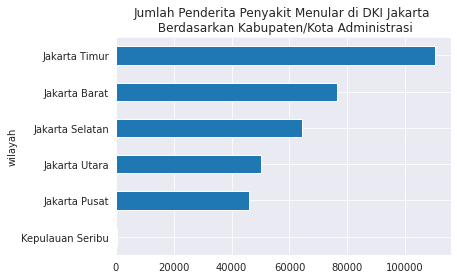

In [ ]:
PlotGrup(grup='wilayah',judul="Jumlah Penderita Penyakit Menular di DKI Jakarta \n Berdasarkan Kabupaten/Kota Administrasi")

Dari *output* dan *bar chart* tersebut, kita dapat mengetahui bahwa Kota Administrasi Jakarta Timur menduduki peringkat pertama dengan jumlah kasus sebanyak 110.252. Kemudian disusul oleh Jakarta Barat (76.418), Jakarta Selatan (64.167), Jakarta Utara (50.019), Jakarta Pusat (46.002), dan Kepulauan Seribu (388).

## 7. Bar Chart Dengan Multikategori (Grid)

Untuk dapat mengetahui data secara keseluruhan dalam satu plot, kita dapat membuat fungsi bernama “PlotGrid”. Perintah untuk fungsi tersebut adalah:

In [ ]:
def PlotGrid(x, kolom, judul):
    sns.set_style('darkgrid')
    g1=sns.catplot(x=x,y='jumlah_penderita', col=kolom, data=data, kind='bar',ci=None,col_wrap=3,height=5,sharey=False)
    g1.fig.subplots_adjust(top=0.9)
    g1.fig.suptitle(judul,fontsize=19)
    g1.set_xticklabels(rotation=30)
    plt.show()
    plt.clf()

Fungsi PlotGrid membutuhkan 3 argumen:
1.   x : Kolom kategori yang akan menjadi sumbu-x
2.   kolom : Kolom kategori yang menjadi pemisah *bar chart*
3.   judul : Judul plot yang akan dibuat

Sebagai contoh, kita akan membuat *bar chart* jumlah kasus berdasarkan nama penyakit dan *bar chart* tersebut dipisah sesuai tahun:

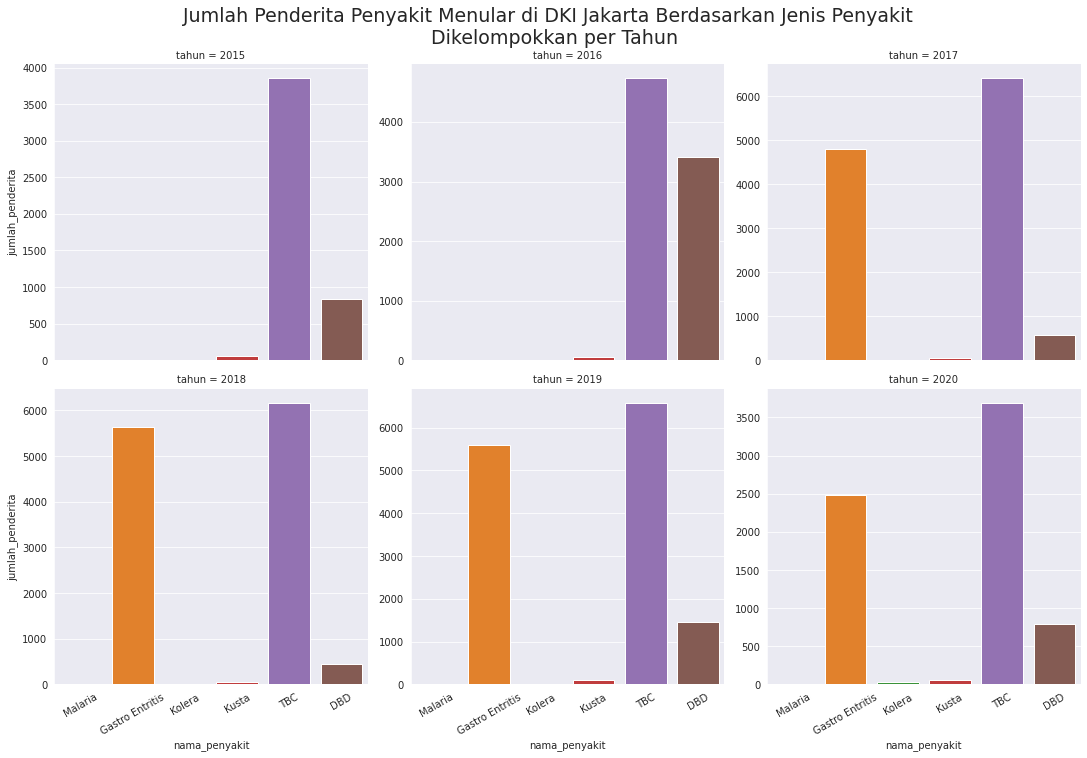

<Figure size 432x288 with 0 Axes>

In [ ]:
PlotGrid(x='nama_penyakit',kolom='tahun',judul="Jumlah Penderita Penyakit Menular di DKI Jakarta Berdasarkan Jenis Penyakit \n Dikelompokkan per Tahun")

*Chart* tersebut tentunya sangat berguna karena kita dapat mengetahui secara keseluruhan penyakit apa yang jumlah penderitanya tertinggi tiap tahun. Pada tahun 2015 dan 2016, penyakit menular di DKI Jakarta didominasi oleh TBC dan DBD. Jumlah Kasus DBD tertinggi terjadi pada tahun 2016. Pada tahun 2017–2020, penyakit menular di DKI Jakarta didominasi oleh TBC dan Gastro Entritis.

Selanjutnya, kita dapat mencari tahu jumlah kasus berdasarkan nama penyakit pada tiap kabupaten/kota administrasi dengan perintah:

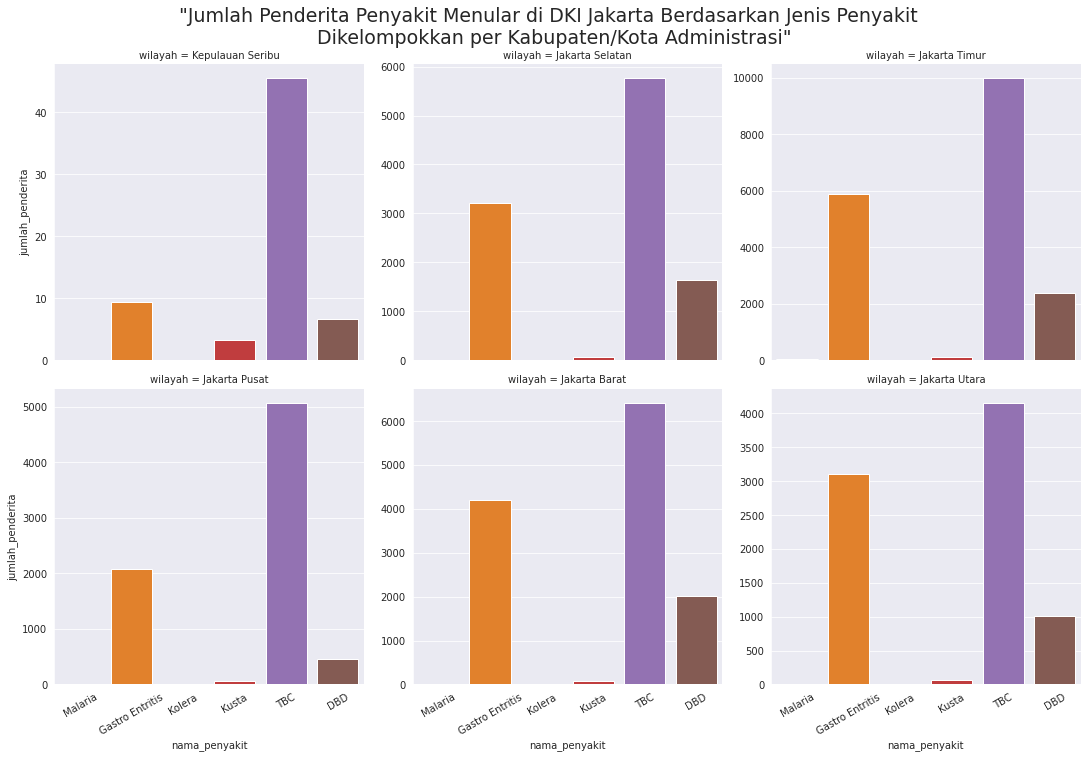

<Figure size 432x288 with 0 Axes>

In [ ]:
PlotGrid(x='nama_penyakit',kolom='wilayah',judul='"Jumlah Penderita Penyakit Menular di DKI Jakarta Berdasarkan Jenis Penyakit \n Dikelompokkan per Kabupaten/Kota Administrasi"')

Dari *chart* tersebut, dapat diketahui kasus TBC tetap menjadi yang tertinggi di tiap kabupaten/kota administrasi. Kasus Gastro Entritis menduduki peringkat ke-2 di tiap kabupaten/kota administrasi.

Terakhir, kita dapat mengetahui jumlah kasus berdasarkan kabupaten/kota administrasi tiap tahun dengan perintah:

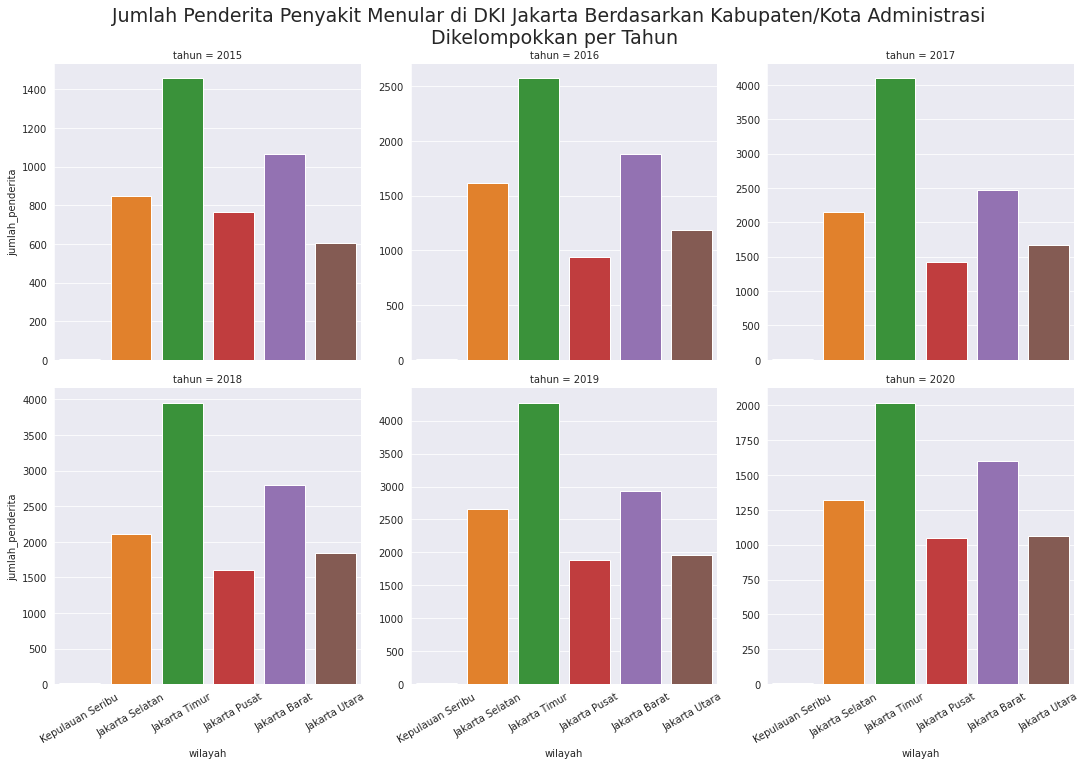

<Figure size 432x288 with 0 Axes>

In [ ]:
PlotGrid(x='wilayah',kolom='tahun',judul="Jumlah Penderita Penyakit Menular di DKI Jakarta Berdasarkan Kabupaten/Kota Administrasi \n Dikelompokkan per Tahun")

Dari *chart* tersebut, dapat diketahui jumlah penderita penyakit menular di Kota Adminisrasi Jakarta Timur tertinggi tiap tahun. Kemudian disusul oleh Jakarta Barat dan Jakarta Selatan. Kasus di Kepulauan Seribu, Jakarta Pusat, dan Jakarta Utara fluktuatif tiap tahun.

# Kesimpulan


1.   Jumlah penderita penyakit menular di DKI Jakarta pada tahun 2015–2019 cenderung meningkat dan mencapai puncaknya pada tahun 2019 sebanyak 82.363 kasus. Jumlah penderita kemudian menurun sekitar 50% pada tahun 2020 dengan kasus sebanyak 42.315.
2.   Sepanjang tahun 2015–2020, TBC (tuberkolosis) merupakan penyakit menular yang berjumlah tertinggi yaitu sebanyak 188.601 kasus. Gastroenteritis menduduki peringkat ke-2 yaitu sebanyak 111.047 kasus dan DBD (demam berdarah dengue) berada pada peringkat ke-3 dengan 44.929 kasus.
3.   Setiap tahun, penyakit menular yang mendominasi di DKI Jakarta adalah TBC dan gastroenteritis. Kedua penyakit tersebut juga tertinggi pada tiap kabupaten/kota administrasi.
4.   Jakarta Timur menjadi kota administrasi dengan jumlah kasus tertinggi baik secara total maupun tiap tahun. Kemudian disusuli Jakarta Barat dan Jakarta Selatan.

Sekian analisis data eksploratif yang bisa saya jelaskan. Saya harap, hasil ini dapat bermanfaat sebagai bahan pengambilan kebijakan atau penelitian lebih lanjut. Jika Anda tertarik akan *project* ini, Anda bisa akses dataset dan syntax pada [GitHub saya](https://github.com/radianlukman/Penyakit-Menular-DKI-Jakarta).

Terima kasih!